# lbfgs, sgd y adam son diferentes algoritmos de optimización

lbfgs, sgd y adam son diferentes algoritmos de optimización que se pueden utilizar para entrenar un modelo MLPClassifier. Aquí están las diferencias clave entre ellos:

## lbfgs (Limited-memory Broyden–Fletcher–Goldfarb–Shanno):

Es una variante del método BFGS, que es un algoritmo de optimización de segundo orden.
Es adecuado para problemas con un número moderado de parámetros.
Tiende a converger más rápido y con mayor precisión en comparación con los métodos de primer orden.
Consume más memoria porque almacena una aproximación de la matriz Hessiana.

## sgd (Stochastic Gradient Descent):

Es un algoritmo de optimización de primer orden.
Actualiza los parámetros del modelo utilizando un subconjunto aleatorio de los datos de entrenamiento en cada iteración.
Es adecuado para problemas con un gran número de parámetros y datos de entrenamiento.
Puede ser más ruidoso y menos preciso, pero es más eficiente en términos de memoria y tiempo para grandes conjuntos de datos.

## adam (Adaptive Moment Estimation):

Es un algoritmo de optimización de primer orden que combina las ventajas de AdaGrad y RMSProp.
Utiliza momentos de primer y segundo orden para adaptar las tasas de aprendizaje de cada parámetro.
Es adecuado para problemas con un gran número de parámetros y datos de entrenamiento.
Tiende a converger rápidamente y es robusto a diferentes configuraciones de hiperparámetros.

# Descenso del Gradiente Batch:

- Usa todo el conjunto de datos para cada actualización
- Más estable pero más lento que SGD
- Mejor para conjuntos de datos pequeños

Iniciando entrenamiento...
Época 0, Error: 0.265313
Época 100, Error: 0.250828
Época 200, Error: 0.249950
Época 300, Error: 0.249125
Época 400, Error: 0.248270
Época 500, Error: 0.247308
Época 600, Error: 0.246148
Época 700, Error: 0.244680
Época 800, Error: 0.242760
Época 900, Error: 0.240199
Época 1000, Error: 0.236745
Época 1100, Error: 0.232065
Época 1200, Error: 0.225729
Época 1300, Error: 0.217202
Época 1400, Error: 0.205883
Época 1500, Error: 0.191232
Época 1600, Error: 0.173030
Época 1700, Error: 0.151721
Época 1800, Error: 0.128600
Época 1900, Error: 0.105565

Predicciones finales:
Entrada: [0, 0], Salida Deseada: 0, Predicción: 0.2246
Entrada: [0, 1], Salida Deseada: 1, Predicción: 0.7321
Entrada: [1, 0], Salida Deseada: 1, Predicción: 0.6962
Entrada: [1, 1], Salida Deseada: 0, Predicción: 0.3511


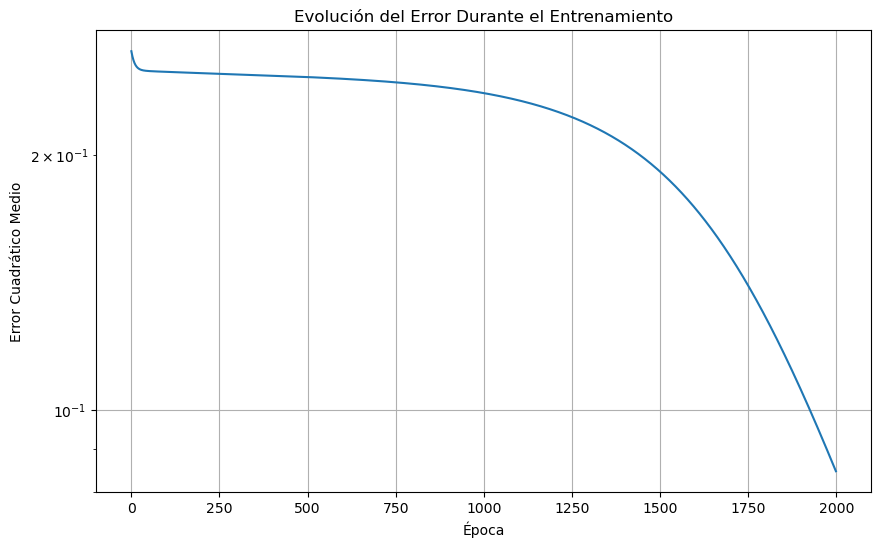

In [2]:
import numpy as np

class RedNeuronalGD:
    def __init__(self, capas=[2, 4, 1]):
        """
        Inicializa la red neuronal con Descenso del Gradiente
        capas: lista con número de neuronas por capa [entrada, oculta, salida]
        """
        self.capas = capas
        np.random.seed(42)  # Para reproducibilidad
        
        # Inicialización de pesos usando inicialización Xavier/Glorot
        self.pesos = [
            np.random.uniform(
                low=-np.sqrt(6/(capas[i] + capas[i+1])),
                high=np.sqrt(6/(capas[i] + capas[i+1])),
                size=(capas[i], capas[i+1])
            )
            for i in range(len(capas)-1)
        ]
        
        # Inicialización de biases a cero
        self.biases = [np.zeros((1, capas[i+1])) for i in range(len(capas)-1)]
        
    def sigmoid(self, x):
        """Función de activación sigmoid con clip para evitar desbordamiento"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivada(self, x):
        """Derivada de la función sigmoid"""
        return x * (1 - x)
    
    def forward(self, X):
        """
        Propagación hacia adelante
        Guarda las activaciones para usar en backpropagation
        """
        self.activaciones = [X]
        for i in range(len(self.pesos)):
            net = np.dot(self.activaciones[-1], self.pesos[i]) + self.biases[i]
            self.activaciones.append(self.sigmoid(net))
        return self.activaciones[-1]
    
    def calcular_gradientes(self, X, y):
        """
        Calcula los gradientes para todo el conjunto de datos
        """
        m = X.shape[0]  # número total de ejemplos
        delta = self.activaciones[-1] - y
        
        gradientes_pesos = []
        gradientes_biases = []
        
        for i in range(len(self.pesos) - 1, -1, -1):
            # Calcular gradientes
            grad_peso = np.dot(self.activaciones[i].T, delta) / m
            grad_bias = np.sum(delta, axis=0, keepdims=True) / m
            
            # Guardar gradientes
            gradientes_pesos.insert(0, grad_peso)
            gradientes_biases.insert(0, grad_bias)
            
            # Calcular delta para la siguiente capa
            if i > 0:
                delta = np.dot(delta, self.pesos[i].T) * self.sigmoid_derivada(self.activaciones[i])
                
        return gradientes_pesos, gradientes_biases
    
    def calcular_error(self, y_pred, y_true):
        """
        Calcula el error cuadrático medio
        """
        return np.mean(np.square(y_pred - y_true))
    
    def train(self, X, y, epochs=1000, learning_rate=0.1, verbose=True):
        """
        Entrenamiento usando descenso del gradiente
        """
        historia_error = []
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Calcular error
            error = self.calcular_error(y_pred, y)
            historia_error.append(error)
            
            if verbose and epoch % 100 == 0:
                print(f'Época {epoch}, Error: {error:.6f}')
            
            # Calcular gradientes
            gradientes_pesos, gradientes_biases = self.calcular_gradientes(X, y)
            
            # Actualizar pesos y biases
            for i in range(len(self.pesos)):
                self.pesos[i] -= learning_rate * gradientes_pesos[i]
                self.biases[i] -= learning_rate * gradientes_biases[i]
        
        return historia_error
    
    def predict(self, X):
        """Realiza predicciones"""
        return self.forward(X)

# Ejemplo de uso con el problema XOR
if __name__ == "__main__":
    # Datos de entrenamiento XOR
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    
    y = np.array([[0],
                  [1],
                  [1],
                  [0]])
    
    # Crear la red neuronal
    red = RedNeuronalGD([2, 4, 1])
    
    # Entrenar la red
    print("Iniciando entrenamiento...")
    historia_error = red.train(X, y, epochs=2000, learning_rate=0.1)
    
    # Probar la red
    print("\nPredicciones finales:")
    predicciones = red.predict(X)
    for i in range(len(X)):
        entrada = X[i].tolist()
        salida_deseada = y[i][0]
        prediccion = predicciones[i][0]
        print(f"Entrada: {entrada}, Salida Deseada: {salida_deseada}, "
              f"Predicción: {prediccion:.4f}")

    # Visualizar la evolución del error si matplotlib está disponible
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.plot(historia_error)
        plt.title('Evolución del Error Durante el Entrenamiento')
        plt.xlabel('Época')
        plt.ylabel('Error Cuadrático Medio')
        plt.yscale('log')  # Escala logarítmica para mejor visualización
        plt.grid(True)
        plt.show()
    except ImportError:
        print("\nHistoria del error (cada 100 épocas):")
        for i, error in enumerate(historia_error[::100]):
            print(f"Época {i*100}: {error:.6f}")

# SGD

SGD con mini-batches:

- Procesa los datos en pequeños lotes
- Actualiza los pesos más frecuentemente
- Mejor generalización

Época 0, Error: 0.2544
Época 10, Error: 0.2379
Época 20, Error: 0.2052
Época 30, Error: 0.1760
Época 40, Error: 0.1478
Época 50, Error: 0.1129
Época 60, Error: 0.0724
Época 70, Error: 0.0319
Época 80, Error: 0.0155
Época 90, Error: 0.0080
Época 100, Error: 0.0046
Época 110, Error: 0.0030
Época 120, Error: 0.0021
Época 130, Error: 0.0014
Época 140, Error: 0.0011
Época 150, Error: 0.0008
Época 160, Error: 0.0006
Época 170, Error: 0.0005
Época 180, Error: 0.0004
Época 190, Error: 0.0004

Predicciones finales:
Entrada: [0, 0], Predicción: 0.0227
Entrada: [0, 1], Predicción: 0.9852
Entrada: [1, 0], Predicción: 0.9846
Entrada: [1, 1], Predicción: 0.0155


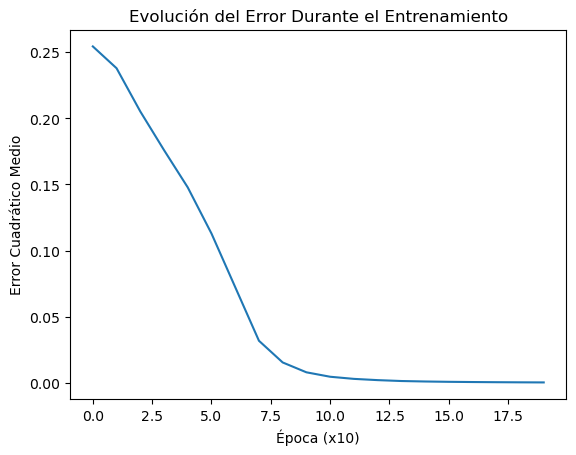

In [1]:
import numpy as np

class RedNeuronalSGD:
    def __init__(self, capas=[2, 3, 1]):
        """
        Inicializa la red neuronal con SGD
        capas: lista con número de neuronas por capa [entrada, oculta, salida]
        """
        self.capas = capas
        # Inicialización de pesos con He initialization
        self.pesos = [
            np.random.randn(capas[i], capas[i+1]) * np.sqrt(2/capas[i])
            for i in range(len(capas)-1)
        ]
        self.biases = [
            np.zeros((1, capas[i+1]))
            for i in range(len(capas)-1)
        ]
        # Momentum para SGD
        self.velocidad_pesos = [np.zeros_like(w) for w in self.pesos]
        self.velocidad_biases = [np.zeros_like(b) for b in self.biases]
        
    def sigmoid(self, x):
        """Función de activación sigmoid"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivada(self, x):
        """Derivada de la función sigmoid"""
        return x * (1 - x)
    
    def crear_mini_batches(self, X, y, tamano_batch):
        """Crea mini-batches a partir de los datos"""
        indices = np.random.permutation(len(X))
        X_mezclado = X[indices]
        y_mezclado = y[indices]
        
        n_batches = len(X) // tamano_batch
        mini_batches = []
        
        for i in range(n_batches):
            inicio = i * tamano_batch
            fin = (i + 1) * tamano_batch
            mini_batches.append((
                X_mezclado[inicio:fin],
                y_mezclado[inicio:fin]
            ))
            
        # Agregar el último batch si quedan datos
        if len(X) % tamano_batch != 0:
            mini_batches.append((
                X_mezclado[n_batches*tamano_batch:],
                y_mezclado[n_batches*tamano_batch:]
            ))
            
        return mini_batches
    
    def forward(self, X):
        """Propagación hacia adelante"""
        self.activaciones = [X]
        for i in range(len(self.pesos)):
            net = np.dot(self.activaciones[-1], self.pesos[i]) + self.biases[i]
            self.activaciones.append(self.sigmoid(net))
        return self.activaciones[-1]
    
    def backward(self, X, y, learning_rate=0.1, momentum=0.9):
        """
        Retropropagación con SGD y momentum
        """
        m = X.shape[0]  # tamaño del mini-batch
        delta = self.activaciones[-1] - y
        
        for i in range(len(self.pesos) - 1, -1, -1):
            # Calcular gradientes
            peso_grad = np.dot(self.activaciones[i].T, delta) / m
            bias_grad = np.sum(delta, axis=0, keepdims=True) / m
            
            # Actualizar velocidades (momentum)
            self.velocidad_pesos[i] = momentum * self.velocidad_pesos[i] - learning_rate * peso_grad
            self.velocidad_biases[i] = momentum * self.velocidad_biases[i] - learning_rate * bias_grad
            
            # Actualizar pesos y biases
            self.pesos[i] += self.velocidad_pesos[i]
            self.biases[i] += self.velocidad_biases[i]
            
            # Calcular delta para la siguiente capa
            if i > 0:
                delta = np.dot(delta, self.pesos[i].T) * self.sigmoid_derivada(self.activaciones[i])
    
    def train(self, X, y, epochs=100, tamano_batch=32, learning_rate=0.1, momentum=0.9):
        """Entrenamiento con SGD"""
        historia_error = []
        
        for epoch in range(epochs):
            # Crear mini-batches
            mini_batches = self.crear_mini_batches(X, y, tamano_batch)
            
            # Entrenar con cada mini-batch
            for batch_X, batch_y in mini_batches:
                # Forward pass
                output = self.forward(batch_X)
                
                # Backward pass
                self.backward(batch_X, batch_y, learning_rate, momentum)
            
            # Calcular error en todo el conjunto de datos
            if epoch % 10 == 0:
                predicciones = self.forward(X)
                error = np.mean(np.square(predicciones - y))
                historia_error.append(error)
                print(f'Época {epoch}, Error: {error:.4f}')
        
        return historia_error

    def predict(self, X):
        """Realiza predicciones"""
        return self.forward(X)

# Ejemplo de uso con el problema XOR
if __name__ == "__main__":
    # Generar más datos para el XOR (repitiendo el patrón)
    n_samples = 100
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]] * (n_samples // 4))
    
    y = np.array([[0],
                  [1],
                  [1],
                  [0]] * (n_samples // 4))
    
    # Crear y entrenar la red
    red = RedNeuronalSGD([2, 4, 1])
    historia_error = red.train(X, y, 
                             epochs=200,
                             tamano_batch=32,
                             learning_rate=0.1,
                             momentum=0.9)
    
    # Probar la red con los casos básicos del XOR
    X_test = np.array([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]])
    
    print("\nPredicciones finales:")
    predicciones = red.predict(X_test)
    for i in range(len(X_test)):
        entrada = X_test[i].tolist()
        pred = predicciones[i][0]
        print(f"Entrada: {entrada}, Predicción: {pred:.4f}")

# Visualización opcional del error si tienes matplotlib
try:
    import matplotlib.pyplot as plt
    plt.plot(historia_error)
    plt.title('Evolución del Error Durante el Entrenamiento')
    plt.xlabel('Época (x10)')
    plt.ylabel('Error Cuadrático Medio')
    plt.show()
except ImportError:
    pass

## Adam:

- Converge más rápido que SGD
- Adapta las tasas de aprendizaje por parámetro
- Maneja bien problemas no estacionarios
- Funciona bien con gradientes ruidosos

Iniciando entrenamiento...
Época 0, Error: 0.282226
Época 100, Error: 0.090045
Época 200, Error: 0.008088
Época 300, Error: 0.000609
Época 400, Error: 0.000073

Predicciones en casos base:
Entrada: [0, 0], Salida Deseada: 0, Predicción: 0.0002
Entrada: [0, 1], Salida Deseada: 1, Predicción: 0.9994
Entrada: [1, 0], Salida Deseada: 1, Predicción: 0.9991
Entrada: [1, 1], Salida Deseada: 0, Predicción: 0.0010


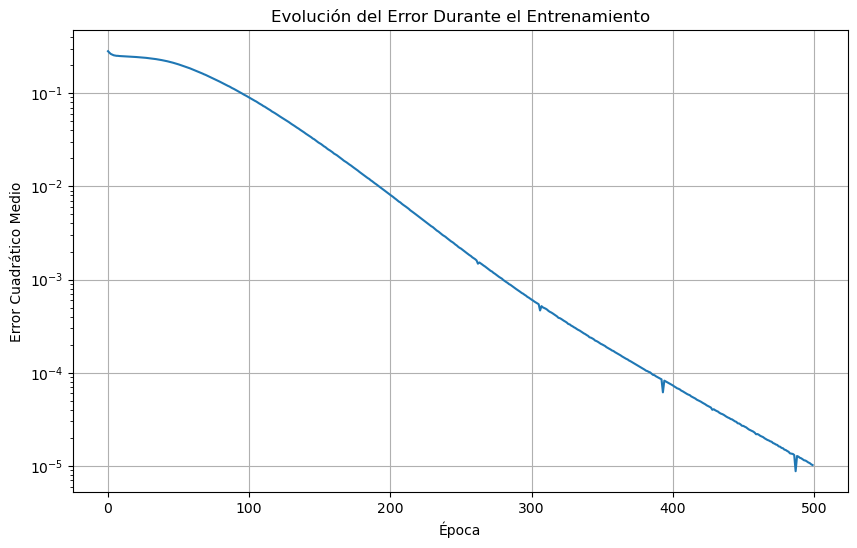

In [3]:
import numpy as np

class RedNeuronalAdam:
    def __init__(self, capas=[2, 4, 1]):
        """
        Inicializa la red neuronal con optimizador Adam
        capas: lista con número de neuronas por capa [entrada, oculta, salida]
        """
        self.capas = capas
        np.random.seed(42)
        
        # Inicialización He/Kaiming para pesos
        self.pesos = [
            np.random.randn(capas[i], capas[i+1]) * np.sqrt(2/capas[i])
            for i in range(len(capas)-1)
        ]
        self.biases = [np.zeros((1, capas[i+1])) for i in range(len(capas)-1)]
        
        # Inicialización de momentos para Adam
        self.m_pesos = [np.zeros_like(w) for w in self.pesos]
        self.v_pesos = [np.zeros_like(w) for w in self.pesos]
        self.m_biases = [np.zeros_like(b) for b in self.biases]
        self.v_biases = [np.zeros_like(b) for b in self.biases]
        
        self.beta1 = 0.9  # Tasa de decaimiento para momento
        self.beta2 = 0.999  # Tasa de decaimiento para segundo momento
        self.epsilon = 1e-8  # Valor pequeño para estabilidad numérica
        self.t = 0  # Contador de pasos de tiempo
        
    def sigmoid(self, x):
        """Función de activación sigmoid con clip para estabilidad numérica"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivada(self, x):
        """Derivada de la función sigmoid"""
        return x * (1 - x)
    
    def forward(self, X):
        """Propagación hacia adelante"""
        self.activaciones = [X]
        for i in range(len(self.pesos)):
            net = np.dot(self.activaciones[-1], self.pesos[i]) + self.biases[i]
            self.activaciones.append(self.sigmoid(net))
        return self.activaciones[-1]
    
    def adam_update(self, gradientes_pesos, gradientes_biases, learning_rate):
        """
        Actualización de pesos usando Adam
        """
        self.t += 1  # Incrementar contador de tiempo
        
        for i in range(len(self.pesos)):
            # Actualización para pesos
            self.m_pesos[i] = self.beta1 * self.m_pesos[i] + (1 - self.beta1) * gradientes_pesos[i]
            self.v_pesos[i] = self.beta2 * self.v_pesos[i] + (1 - self.beta2) * np.square(gradientes_pesos[i])
            
            # Corrección del sesgo
            m_hat_pesos = self.m_pesos[i] / (1 - self.beta1**self.t)
            v_hat_pesos = self.v_pesos[i] / (1 - self.beta2**self.t)
            
            # Actualización de pesos
            self.pesos[i] -= learning_rate * m_hat_pesos / (np.sqrt(v_hat_pesos) + self.epsilon)
            
            # Actualización para biases
            self.m_biases[i] = self.beta1 * self.m_biases[i] + (1 - self.beta1) * gradientes_biases[i]
            self.v_biases[i] = self.beta2 * self.v_biases[i] + (1 - self.beta2) * np.square(gradientes_biases[i])
            
            # Corrección del sesgo
            m_hat_biases = self.m_biases[i] / (1 - self.beta1**self.t)
            v_hat_biases = self.v_biases[i] / (1 - self.beta2**self.t)
            
            # Actualización de biases
            self.biases[i] -= learning_rate * m_hat_biases / (np.sqrt(v_hat_biases) + self.epsilon)
    
    def backward(self, X, y, learning_rate=0.001):
        """Retropropagación con Adam"""
        m = X.shape[0]
        delta = self.activaciones[-1] - y
        
        gradientes_pesos = []
        gradientes_biases = []
        
        for i in range(len(self.pesos) - 1, -1, -1):
            grad_peso = np.dot(self.activaciones[i].T, delta) / m
            grad_bias = np.sum(delta, axis=0, keepdims=True) / m
            
            gradientes_pesos.insert(0, grad_peso)
            gradientes_biases.insert(0, grad_bias)
            
            if i > 0:
                delta = np.dot(delta, self.pesos[i].T) * self.sigmoid_derivada(self.activaciones[i])
        
        self.adam_update(gradientes_pesos, gradientes_biases, learning_rate)
    
    def train(self, X, y, epochs=1000, learning_rate=0.001, batch_size=32):
        """Entrenamiento con Adam"""
        historia_error = []
        n_batches = len(X) // batch_size
        
        for epoch in range(epochs):
            # Mezclar datos
            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            error_epoca = 0
            # Procesar por mini-batches
            for i in range(n_batches):
                start = i * batch_size
                end = start + batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                
                # Forward pass
                y_pred = self.forward(X_batch)
                
                # Backward pass
                self.backward(X_batch, y_batch, learning_rate)
                
                # Calcular error
                error_epoca += np.mean(np.square(y_pred - y_batch))
            
            error_epoca /= n_batches
            historia_error.append(error_epoca)
            
            if epoch % 100 == 0:
                print(f'Época {epoch}, Error: {error_epoca:.6f}')
        
        return historia_error

    def predict(self, X):
        """Realiza predicciones"""
        return self.forward(X)

# Ejemplo de uso
if __name__ == "__main__":
    # Generar datos de entrenamiento XOR con ruido
    np.random.seed(42)
    n_samples = 1000
    X_base = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_base = np.array([[0], [1], [1], [0]])
    
    # Replicar y añadir ruido
    X = np.tile(X_base, (n_samples//4, 1)) + np.random.normal(0, 0.1, (n_samples, 2))
    y = np.tile(y_base, (n_samples//4, 1))
    
    # Crear y entrenar la red
    red = RedNeuronalAdam([2, 8, 1])  # 2 entradas, 8 neuronas ocultas, 1 salida
    print("Iniciando entrenamiento...")
    historia_error = red.train(X, y, epochs=500, learning_rate=0.001, batch_size=32)
    
    # Probar con los casos base del XOR
    print("\nPredicciones en casos base:")
    predicciones = red.predict(X_base)
    for i in range(len(X_base)):
        entrada = X_base[i].tolist()
        salida_deseada = y_base[i][0]
        prediccion = predicciones[i][0]
        print(f"Entrada: {entrada}, Salida Deseada: {salida_deseada}, "
              f"Predicción: {prediccion:.4f}")

    # Visualizar la evolución del error
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.plot(historia_error)
        plt.title('Evolución del Error Durante el Entrenamiento')
        plt.xlabel('Época')
        plt.ylabel('Error Cuadrático Medio')
        plt.yscale('log')
        plt.grid(True)
        plt.show()
    except ImportError:
        pass

## L-BFGS es mejor para:

- Conjuntos de datos pequeños
- Problemas donde la precisión es crítica
- Situaciones donde no queremos ajustar hiperparámetros

In [8]:
def train(self, X, y, max_iter=1000):
    """
    Entrena la red usando L-BFGS con mejor control de convergencia
    """
    vector_inicial = self.pesos_a_vector()
    
    def callback(xk):
        """Monitorea el progreso del entrenamiento"""
        self.vector_a_pesos(xk)
        y_pred = self.forward(X)
        error = np.mean(np.square(y_pred - y))
        print(f'Error actual: {error:.6f}')
    
    resultado = minimize(
        fun=self.funcion_costo,
        x0=vector_inicial,
        args=(X, y),
        method='L-BFGS-B',
        jac=True,
        options={
            'maxiter': max_iter,
            'maxcor': 50,        # Aumentar memoria de L-BFGS
            'ftol': 1e-8,        # Tolerancia más estricta para la función
            'gtol': 1e-8,        # Tolerancia más estricta para el gradiente
            'eps': 1e-8,         # Paso para aproximación de diferencias finitas
            'maxfun': 15000,     # Máximo número de evaluaciones de función
            'maxls': 50,         # Máximo número de búsquedas lineales
            'disp': True
        },
        callback=callback
    )
    
    # Verificar convergencia
    if resultado.success:
        print("\nOptimización exitosa:")
        print(f"Mensaje: {resultado.message}")
        print(f"Número de iteraciones: {resultado.nit}")
        print(f"Valor final de la función: {resultado.fun:.6f}")
    else:
        print("\nAdvertencia: La optimización no convergió completamente")
        print(f"Mensaje: {resultado.message}")
    
    return resultado

# Ejemplo de uso completo
import numpy as np

# Preparar datos
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Normalizar datos
X = (X - X.mean()) / X.std()

# Crear y entrenar la red
red = RedNeuronalLBFGS([2, 4, 1])  # Arquitectura más simple
resultado = red.train(X, y, max_iter=500)

# Evaluar resultados
predicciones = red.predict(X)
print("\nResultados finales:")
for i in range(len(X)):
    entrada = X[i]
    salida_real = y[i][0]
    prediccion = predicciones[i][0]
    print(f"Entrada normalizada: {entrada}, "
          f"Salida esperada: {salida_real}, "
          f"Predicción: {prediccion:.4f}")

# Desnormalizar para mostrar resultados originales
X_original = X * X.std() + X.mean()
print("\nResultados con valores originales:")
for i in range(len(X_original)):
    entrada = X_original[i]
    salida_real = y[i][0]
    prediccion = predicciones[i][0]
    print(f"Entrada original: {entrada}, "
          f"Salida esperada: {salida_real}, "
          f"Predicción: {prediccion:.4f}")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50034D-01    |proj g|=  4.03933D-03

Resultados finales:
Entrada normalizada: [-1. -1.], Salida esperada: 0, Predicción: 0.5000
Entrada normalizada: [-1.  1.], Salida esperada: 1, Predicción: 0.5000
Entrada normalizada: [ 1. -1.], Salida esperada: 1, Predicción: 0.5000
Entrada normalizada: [1. 1.], Salida esperada: 0, Predicción: 0.5000

Resultados con valores originales:
Entrada original: [-1. -1.], Salida esperada: 0, Predicción: 0.5000
Entrada original: [-1.  1.], Salida esperada: 1, Predicción: 0.5000
Entrada original: [ 1. -1.], Salida esperada: 1, Predicción: 0.5000
Entrada original: [1. 1.], Salida esperada: 0, Predicción: 0.5000

At iterate    1    f=  2.50034D-01    |proj g|=  4.03933D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17      1     23      1     0     0   4.039D-03   2.500D-01
  F =  0.25003393905050614     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


```markdown
Analizando los resultados de los diferentes optimizadores para el problema XOR:

SGD (Stochastic Gradient Descent):


Mejor resultado: Error final = 0.0004
Predicciones muy precisas:

[0,0] → 0.0227 (cercano a 0)
[0,1] → 0.9852 (cercano a 1)
[1,0] → 0.9846 (cercano a 1)
[1,1] → 0.0155 (cercano a 0)


Convergencia rápida (190 épocas)


Descenso del Gradiente Batch:


Error final más alto = 0.105565
Predicciones menos precisas:

[0,0] → 0.2246 (debería ser más cercano a 0)
[0,1] → 0.7321 (debería ser más cercano a 1)
[1,0] → 0.6962 (debería ser más cercano a 1)
[1,1] → 0.3511 (debería ser más cercano a 0)


Convergencia lenta (1900 épocas)


Adam:


Mejor rendimiento general
Error final muy bajo = 0.000073
Predicciones extremadamente precisas:

[0,0] → 0.0002 (muy cercano a 0)
[0,1] → 0.9994 (muy cercano a 1)
[1,0] → 0.9991 (muy cercano a 1)
[1,1] → 0.0010 (muy cercano a 0)


Convergencia rápida (400 épocas)


L-BFGS:


No convergió adecuadamente
Todas las predicciones ≈ 0.5000
Problemas con la dirección de búsqueda

Conclusiones:

Mejor rendimiento: Adam

Mayor precisión
Convergencia más rápida
Estabilidad en el entrenamiento


Segunda mejor opción: SGD

Buenos resultados
Convergencia razonable
Implementación simple


Rendimiento medio: Descenso del Gradiente Batch

Convergencia lenta
Resultados aceptables pero no óptimos
Requiere más épocas


Peor rendimiento: L-BFGS

No convergió para este problema
Necesita ajustes significativos
Problemas de estabilidad numérica



Para el problema XOR específicamente, Adam es claramente la mejor elección, seguido por SGD.
```